In [55]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import numpy as np
import os,sys
from sklearn.metrics import classification_report, confusion_matrix

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [56]:
df=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [57]:
copy_df = df

In [58]:
copy_df.shape

(180, 7)

In [59]:
copy_df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
dupes = copy_df.duplicated()
sum(dupes)

89

In [61]:
##here we can see that there are 13 duplicated rows. We want to remove the duplicate rows.

#Removing Duplicates
copy_df =copy_df.drop_duplicates()

In [62]:
copy_df.shape

(91, 7)

In [63]:
copy_df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0


In [64]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.7+ KB


In [65]:
copy_df.isna().sum()

Name     1
Runs     1
Ave      1
SR       1
Fours    1
Sixes    1
HF       1
dtype: int64

In [66]:
copy_df.dropna(inplace=True)  # Drops all the rows that have atleast one missing values
copy_df.isnull().sum()

<ipython-input-66-498b7df54fd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df.dropna(inplace=True)  # Drops all the rows that have atleast one missing values


Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [67]:
copy_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


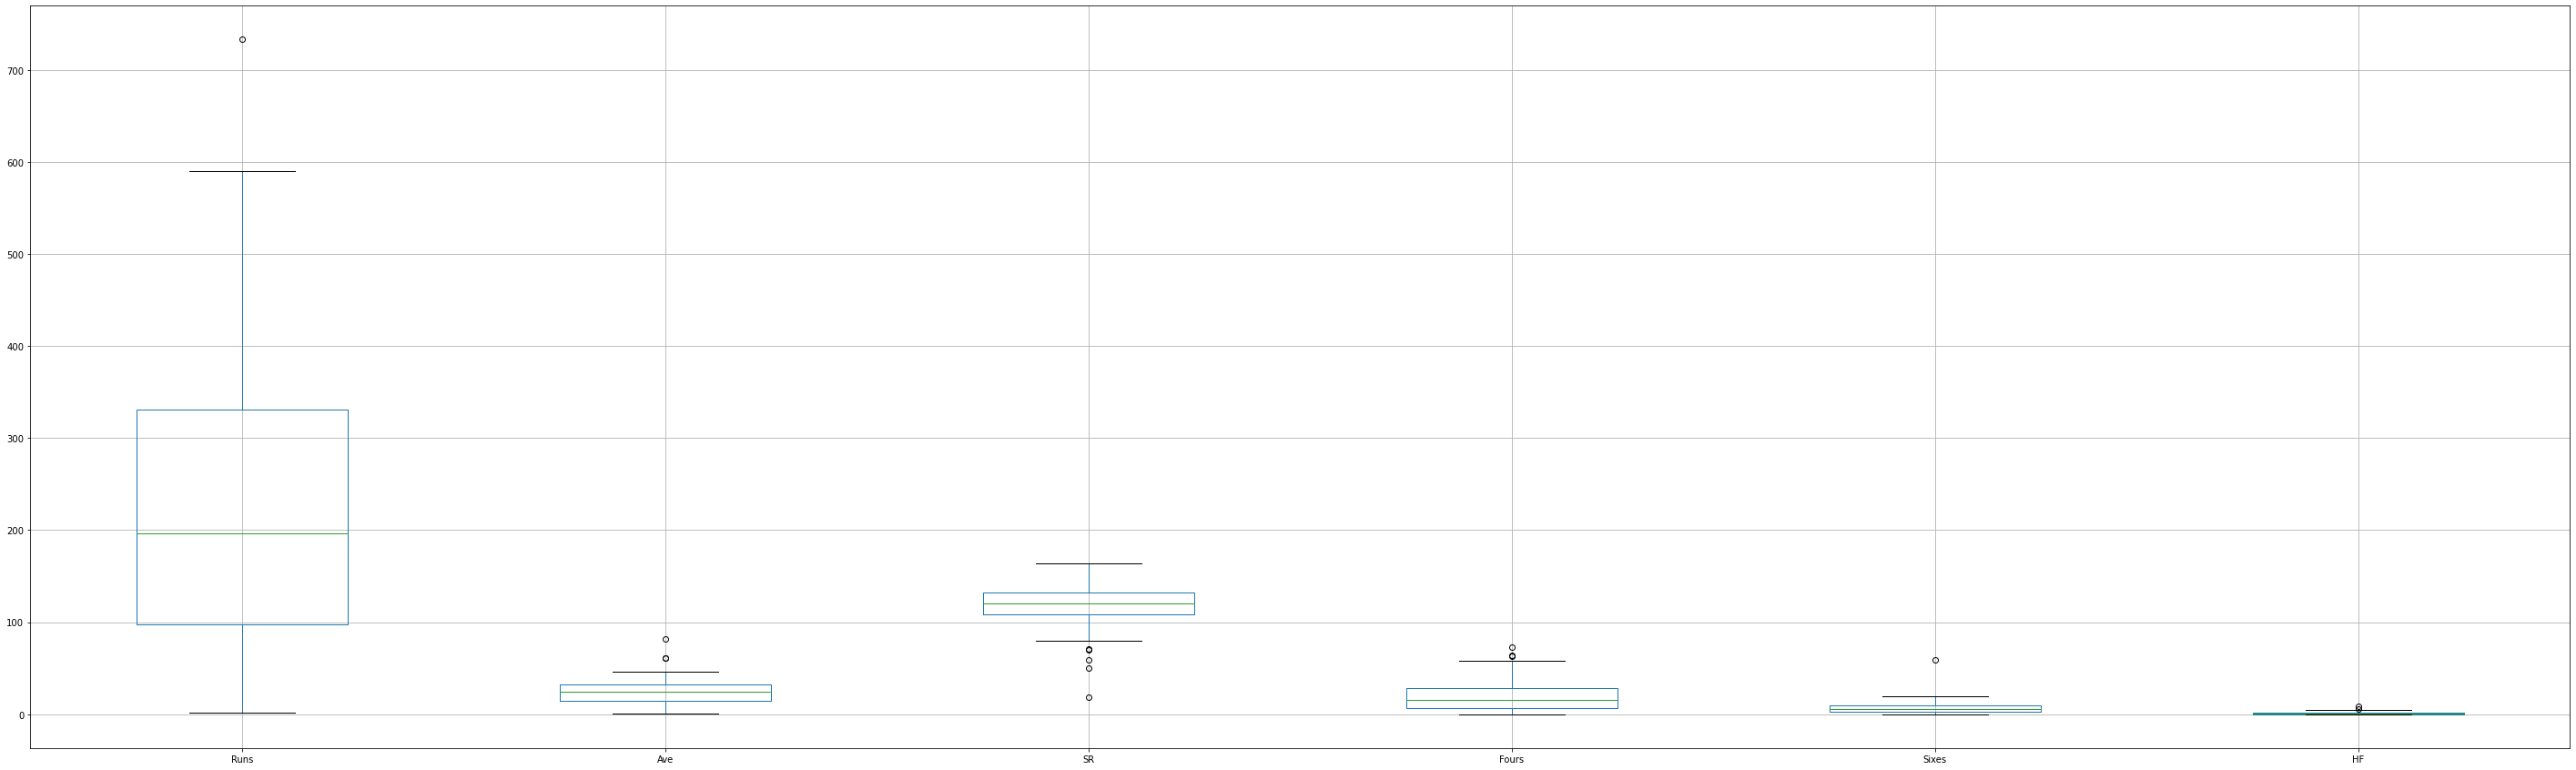

In [68]:
copy_df.boxplot(figsize=(50,15))

In [71]:
df_name=copy_df['Name']
copy_df=copy_df.drop(['Name'], axis=1)

In [72]:
#find the outliers and replace them by median
for col_name in copy_df.columns[:-1]:
    q1 = copy_df[col_name].quantile(0.25)
    q3 = copy_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    copy_df.loc[(copy_df[col_name] < low) | (copy_df[col_name] > high), col_name] = copy_df[col_name].median()

In [73]:
copy_df.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,196.5,24.44,160.74,46.0,6.0,9.0
3,590.0,36.87,143.55,16.0,17.0,6.0
5,495.0,33.00,161.23,57.0,19.0,5.0
7,479.0,43.54,149.68,41.0,20.0,5.0
9,569.0,40.64,129.61,58.0,18.0,5.0


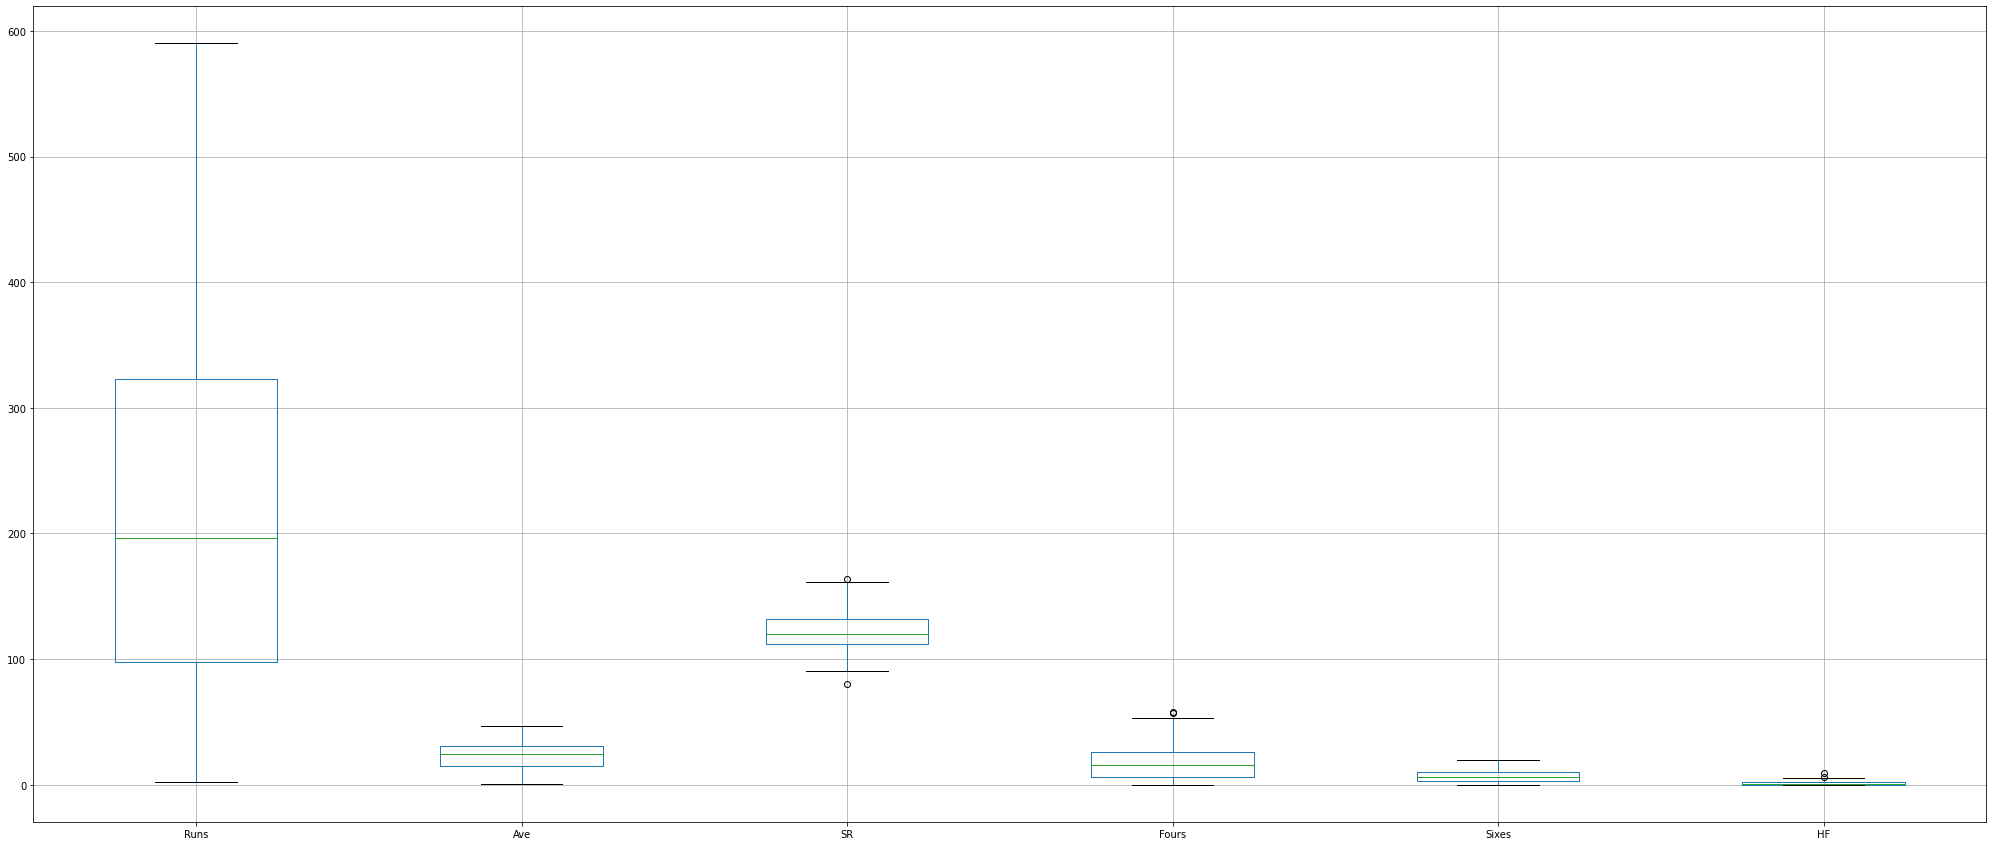

In [74]:
# again check for outliers in dataset using boxplot
copy_df.boxplot(figsize=(35,15))

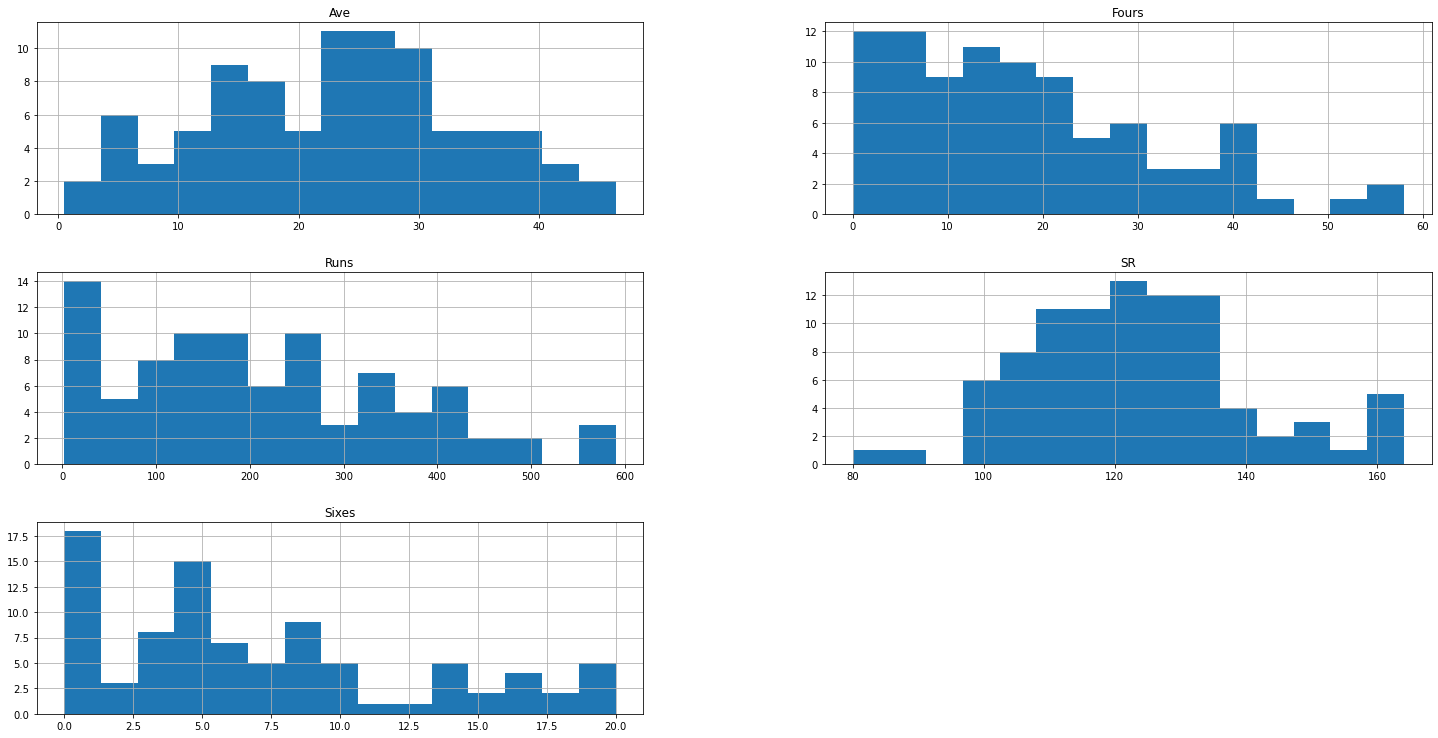

In [75]:
columns = list(copy_df)[0:-1] # Excluding Outcome column which has only 
copy_df[columns].hist(stacked=False, bins=15, figsize=(25,100), layout=(22,2)); 

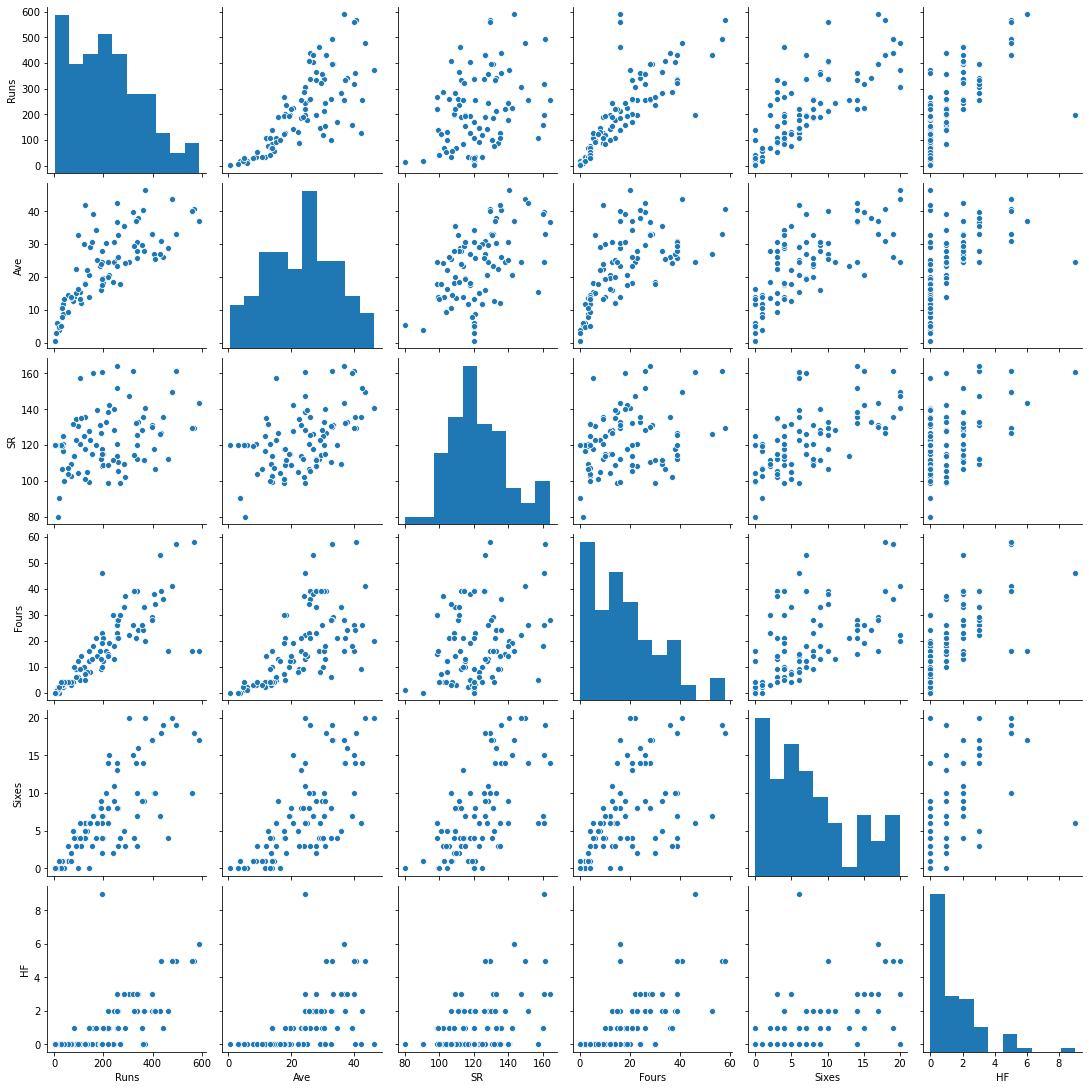

In [76]:
sns.pairplot(copy_df)

In [77]:
def plot_corr(copy_df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    

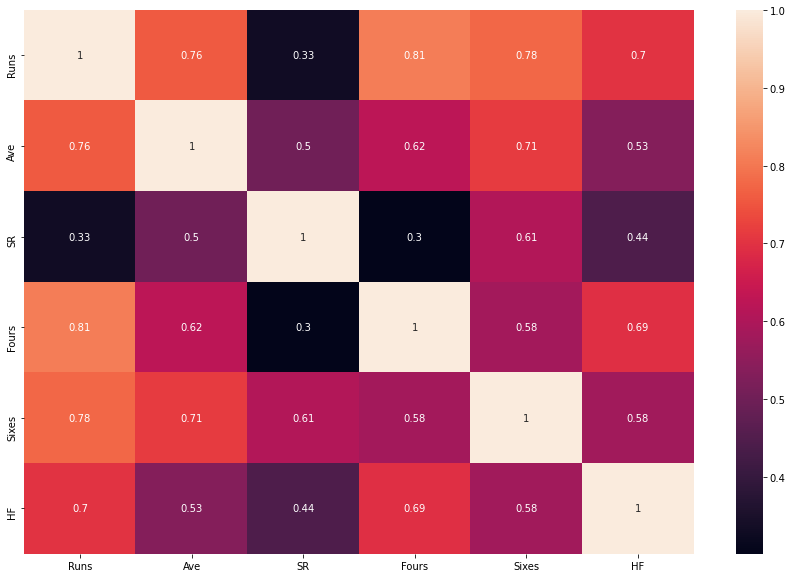

In [78]:
plt.figure(figsize = (15,10))
sns.heatmap(copy_df.corr(), annot = True )
#plot_corr(cr_df)

It can be observed that there is strong dependability on high runs and fours, Avg, sixes and HF.

In [79]:
df_name

1         CH Gayle
3        G Gambhir
5         V Sehwag
7         CL White
9         S Dhawan
          ...     
171         Z Khan
173     WD Parnell
175    PC Valthaty
177       RP Singh
179       R Sharma
Name: Name, Length: 90, dtype: object

In [80]:
X = copy_df
y = df_name

In [81]:
# Scaling the independent attributes using zscore
from scipy.stats import zscore
X_z=X.apply(zscore)
X_z.shape

(90, 6)

In [82]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_z.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.01123596 0.7678912  0.33594464 0.81859977 0.78542408 0.70885767]
 [0.7678912  1.01123596 0.50733058 0.63021016 0.72276442 0.5407155 ]
 [0.33594464 0.50733058 1.01123596 0.3041188  0.61461271 0.44954729]
 [0.81859977 0.63021016 0.3041188  1.01123596 0.59134232 0.70219247]
 [0.78542408 0.72276442 0.61461271 0.59134232 1.01123596 0.5876696 ]
 [0.70885767 0.5407155  0.44954729 0.70219247 0.5876696  1.01123596]]


In [83]:
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.45386746 -0.30269998 -0.20343847 -0.78121291 -0.22510657  0.00482321]
 [-0.42250705  0.07217767 -0.5234602   0.19674332  0.55459412  0.44270195]
 [-0.30651733  0.80391292  0.27469664 -0.26948854  0.21855621 -0.25282802]
 [-0.41402399 -0.42186359  0.15554119  0.2650743   0.32720207 -0.6701467 ]
 [-0.43401852  0.23018554 -0.27968846  0.43472405 -0.69266505 -0.10792138]
 [-0.40218317 -0.16103679  0.71184639  0.13829313 -0.08449556  0.52851309]]

 Eigen Values 
%s [4.0788969  0.85663235 0.50704377 0.09342357 0.28621429 0.24520485]


In [84]:
# Make a set of (eigenvalue, eigenvector) pairs
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:]

[(4.078896895210579,
  array([-0.45386746, -0.42250705, -0.30651733, -0.41402399, -0.43401852,
         -0.40218317])),
 (0.8566323509807924,
  array([-0.30269998,  0.07217767,  0.80391292, -0.42186359,  0.23018554,
         -0.16103679])),
 (0.5070437673763495,
  array([-0.20343847, -0.5234602 ,  0.27469664,  0.15554119, -0.27968846,
          0.71184639])),
 (0.2862142933541556,
  array([-0.22510657,  0.55459412,  0.21855621,  0.32720207, -0.69266505,
         -0.08449556])),
 (0.24520485048156382,
  array([ 0.00482321,  0.44270195, -0.25282802, -0.6701467 , -0.10792138,
          0.52851309])),
 (0.09342357293364156,
  array([-0.78121291,  0.19674332, -0.26948854,  0.2650743 ,  0.43472405,
          0.13829313]))]

In [85]:
# Reducing from 17 to 10 dimension space
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
data_reduced = pca.fit_transform(X_z)
data_reduced.transpose()

array([[ 3.31988156,  3.92180894,  4.94062172,  4.68578242,  4.84667888,
         2.92689137,  2.30236999,  3.41575014,  2.94825609,  0.58188872,
         2.66263068,  2.36647301,  2.6189392 ,  2.42803191,  2.46347498,
         2.31691456,  2.43882403,  1.88437265,  2.13271638,  0.70290539,
         1.08380101,  1.58307979,  1.7750456 ,  1.18691791,  1.67129355,
         1.43557672,  0.9737889 ,  1.13054858,  1.23987599,  0.86274359,
         1.02981483,  0.85503427,  1.29545161,  1.14352946,  0.58126247,
         0.6003123 ,  0.56061078,  0.45041369,  0.05723016,  0.07509411,
         0.10960848, -0.21979217, -0.21207247, -0.54803661, -0.40981786,
        -0.72394865, -0.32126758, -0.76799214, -0.56133999, -0.74289629,
        -0.65332182, -0.58141883, -0.59176573, -0.68473275, -0.78375193,
        -1.06435443, -0.72378898, -0.624549  , -0.69757354, -0.86199676,
        -0.63363184, -0.88957512, -1.25658589, -1.4589854 , -1.55361037,
        -1.37460172, -1.47144214, -1.55576142, -1.6

In [86]:
X_comp = pd.DataFrame(pca.components_,columns=list(X_z))
X_comp.head()

,Runs,Ave,SR,Fours,Sixes,HF
0,0.453867,0.422507,0.306517,0.414024,0.434019,0.402183
1,-0.302700,0.072178,0.803913,-0.421864,0.230186,-0.161037
2,-0.203438,-0.523460,0.274697,0.155541,-0.279688,0.711846
3,-0.225107,0.554594,0.218556,0.327202,-0.692665,-0.084496
4,0.004823,0.442702,-0.252828,-0.670147,-0.107921,0.528513
